In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penugasan-oprec-dsai-2024/sample_submission.csv
/kaggle/input/penugasan-oprec-dsai-2024/Train.csv
/kaggle/input/penugasan-oprec-dsai-2024/Test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('/kaggle/input/penugasan-oprec-dsai-2024/Train.csv')
df_test = pd.read_csv('/kaggle/input/penugasan-oprec-dsai-2024/Test.csv')

EDA

In [4]:
df_train

,id,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary
0,0,2024.0,NaN,FT,Data Engineer,USD,US,0.0,US,M,138000
1,1,2024.0,SE,FT,Software Engineer,USD,US,2.0,NaN,M,180000
2,2,2024.0,NaN,FT,Machine Learning Engineer,USD,US,0.0,US,M,118500
3,3,2024.0,NaN,NaN,Data Engineer,USD,US,0.0,US,M,180000
4,4,2024.0,SE,FT,Product Manager,USD,US,0.0,US,NaN,204000
...,...,...,...,...,...,...,...,...,...,...,...
35073,49995,2024.0,SE,NaN,Data Analyst,USD,AU,NaN,NaN,M,88333
35074,49996,NaN,MI,NaN,Business Intelligence,USD,US,NaN,US,M,252291
35075,49997,2024.0,NaN,FT,Product Manager,USD,US,0.0,US,NaN,196010
35076,49998,NaN,MI,FT,Data Architect,USD,PT,0.0,PT,M,50316


In [5]:
df_train.nunique()

id                    35078
work_year                 5
experience_level          4
employment_type           4
job_title               209
salary_currency          10
employee_residence       59
remote_ratio              3
company_location         61
company_size              3
salary                14960
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35078 entries, 0 to 35077
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35078 non-null  int64  
 1   work_year           28062 non-null  float64
 2   experience_level    28062 non-null  object 
 3   employment_type     28062 non-null  object 
 4   job_title           35078 non-null  object 
 5   salary_currency     35078 non-null  object 
 6   employee_residence  28062 non-null  object 
 7   remote_ratio        28062 non-null  float64
 8   company_location    28062 non-null  object 
 9   company_size        28062 non-null  object 
 10  salary              35078 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 2.9+ MB


In [7]:
df_train.describe()

,id,work_year,remote_ratio,salary
count,35078.000000,28062.000000,28062.000000,35078.000000
mean,23213.081476,2023.686373,0.482646,150517.661811
std,14114.394161,0.698085,0.855120,72965.037566
min,0.000000,2020.000000,0.000000,15000.000000
25%,11158.750000,2024.000000,0.000000,99070.750000
50%,22410.500000,2024.000000,0.000000,140000.000000
75%,34760.750000,2024.000000,0.000000,191920.500000
max,49999.000000,2024.000000,2.000000,800000.000000


In [8]:
df_train.duplicated().sum()

0

In [9]:
df_train.isnull().sum() / len(df_train) * 100

id                     0.00000
work_year             20.00114
experience_level      20.00114
employment_type       20.00114
job_title              0.00000
salary_currency        0.00000
employee_residence    20.00114
remote_ratio          20.00114
company_location      20.00114
company_size          20.00114
salary                 0.00000
dtype: float64

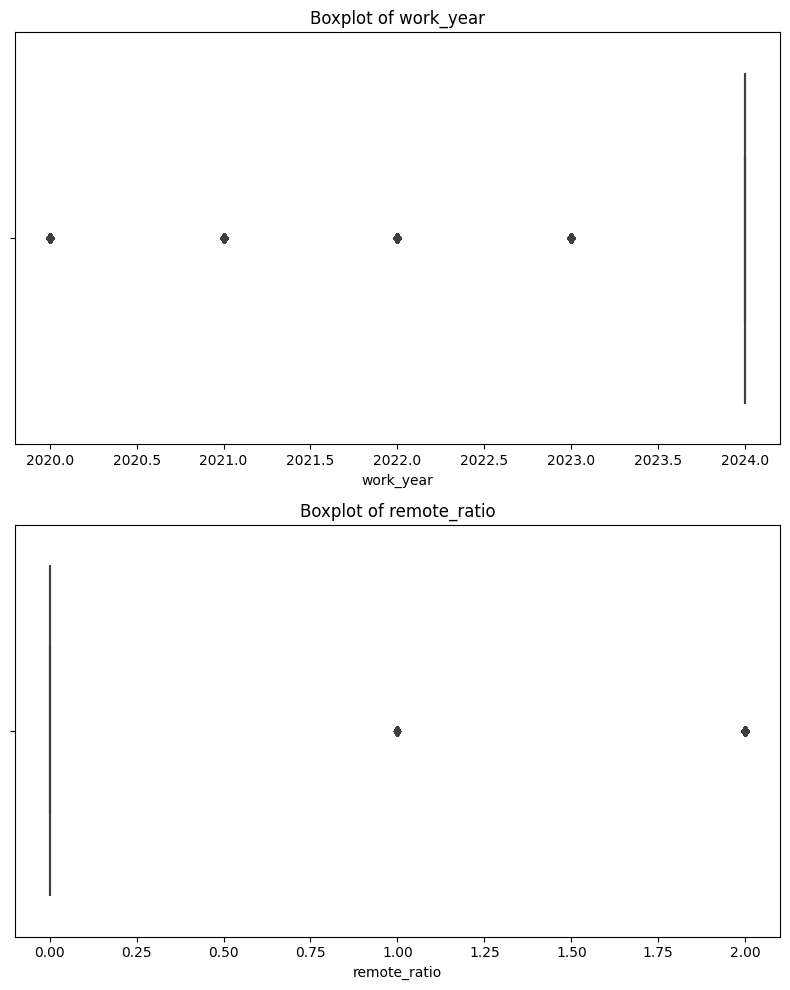

In [10]:
# Specify the numerical columns (adjust as per your data)
numerical_columns = ['work_year', 'remote_ratio']  # example columns

# Set up the plot (one plot per column, vertically)
plt.figure(figsize=(8, len(numerical_columns) * 5))  # Adjust figure size for vertical arrangement

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)  # Arrange vertically (n rows, 1 column)
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Data Preprocessing

In [11]:
df_train = df_train.apply(lambda col: col.fillna(col.mode()[0]) if col.isnull().any() else col)
df_test = df_test.apply(lambda col: col.fillna(col.mode()[0]) if col.isnull().any() else col)

In [12]:
df_train['experience_level'] = df_train['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})
df_test['experience_level'] = df_test['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})

df_train['company_size'] = df_train['company_size'].map({'S': 0, 'M': 1, 'L': 2})
df_test['company_size'] = df_test['company_size'].map({'S': 0, 'M': 1, 'L': 2})

In [13]:
df_train = pd.get_dummies(df_train, columns=['experience_level', 'employment_type'])
df_test = pd.get_dummies(df_test, columns=['experience_level', 'employment_type'])

In [14]:
# List of categorical columns to apply frequency encoding
categorical_columns = ['job_title', 'salary_currency', 'employee_residence', 'company_location']

# Apply frequency encoding to each categorical column for training data
for col in categorical_columns:
    frequency_encoding = df_train[col].value_counts()
    df_train[f'{col}_encoded'] = df_train[col].map(frequency_encoding)

# Apply frequency encoding to each categorical column for test data
for col in categorical_columns:
    frequency_encoding = df_train[col].value_counts()  # Use the training data's encoding
    df_test[f'{col}_encoded'] = df_test[col].map(frequency_encoding)

# Drop original columns from both training and test data
df_train.drop(columns=categorical_columns, inplace=True)
df_test.drop(columns=categorical_columns, inplace=True)

Modelling

In [15]:
# Assuming 'salary' is the target and 'id' is an identifier (not used in training)
y_train = df_train['salary'].values
X_train = df_train.drop(['salary', 'id'], axis=1).values
X_test = df_test.drop(['id'], axis=1).values  # Ensure X_test is the feature set

In [16]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (no fitting here)
X_test_scaled = scaler.transform(X_test)

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

# Define the models and their hyperparameters
models = [
    {
        'name': 'Linear Regression',
        'model': Pipeline([
            ('regressor', LinearRegression())
        ]),
        'params': {
            'regressor__fit_intercept': [True, False]
        }
    },
    {
        'name': 'Random Forest',
        'model': Pipeline([
            ('regressor', RandomForestRegressor(random_state=42))
        ]),
        'params': {
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [None, 10, 20],
            'regressor__min_samples_split': [2, 5]
        }
    },
    {
        'name': 'K-Neighbors Regressor',
        'model': Pipeline([
            ('regressor', KNeighborsRegressor())
        ]),
        'params': {
            'regressor__n_neighbors': [3, 5, 10],
            'regressor__weights': ['uniform', 'distance']
        }
    }
]

# Cross-validation and hyperparameter tuning
best_model = None
best_score = float('inf')

for model_info in models:
    print(f"Tuning {model_info['name']}...")
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    # Calculate the mean RMSE from cross-validation
    mean_rmse = np.sqrt(-grid_search.best_score_)
    print(f"Best RMSE for {model_info['name']}: {mean_rmse}")

    if mean_rmse < best_score:
        best_score = mean_rmse
        best_model = grid_search.best_estimator_

print("\nBest Model Selected:")
print(best_model)
print(f"Best RMSE: {best_score}")

# Predict on the test set (without knowing the actual salary)
y_pred = best_model.predict(X_test)

# If you want to save or display predictions:
print("Predicted salaries for the test set:")
print(y_pred)


Tuning Linear Regression...
Best RMSE for Linear Regression: 67883.5963917806
Tuning Random Forest...
Best RMSE for Random Forest: 63107.424569778115
Tuning K-Neighbors Regressor...
Best RMSE for K-Neighbors Regressor: 65422.043850373484

Best Model Selected:
Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       n_estimators=200, random_state=42))])
Best RMSE: 63107.424569778115
Predicted salaries for the test set:
[128299.62147375 142316.76486493 183842.09403059 ... 200529.73268302
 176793.79441584  49403.45401451]


In [18]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'id': df_test['id'],  # Assuming 'id' is present in df_test for identification
    'salary': y_pred
})

# Save to CSV
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions have been saved to 'predictions.csv'.")

Predictions have been saved to 'predictions.csv'.
